In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output


print(check_output(["ls", "./"]).decode("utf8"))

Untitled.ipynb
Untitled1.ipynb
hw1
hw2
iris.data



In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical

dataset = pd.read_csv('./iris.data')

dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [22]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.fit_transform(X_test)

In [23]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

# model.add(Dense(10,input_shape=(4,),activation='tanh'))
# model.add(Dense(8,activation='tanh'))
# model.add(Dense(6,activation='tanh'))
model.add(Dense(3,input_shape=(3,),activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [24]:
#fitting the model and predicting 
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Train on 119 samples, validate on 30 samples
Epoch 1/100
119/119 [==============================] - 1s 5ms/step - loss: 0.8661 - acc: 0.5630 - val_loss: 0.7970 - val_acc: 0.6667
Epoch 2/100
119/119 [==============================] - 0s 108us/step - loss: 0.8006 - acc: 0.6639 - val_loss: 0.7558 - val_acc: 0.6667
Epoch 3/100
119/119 [==============================] - 0s 133us/step - loss: 0.7503 - acc: 0.6639 - val_loss: 0.7098 - val_acc: 0.6667
Epoch 4/100
119/119 [==============================] - 0s 151us/step - loss: 0.7064 - acc: 0.6639 - val_loss: 0.6632 - val_acc: 0.6667
Epoch 5/100
119/119 [==============================] - 0s 153us/step - loss: 0.6672 - acc: 0.6639 - val_loss: 0.6281 - val_acc: 0.6667
Epoch 6/100
119/119 [==============================] - 0s 192us/step - loss: 0.6348 - acc: 0.6891 - val_loss: 0.6001 - val_acc: 0.7000
Epoch 7/100
119/119 [==============================] - 0s 199us/step - loss: 0.6066 - acc: 0.6975 - val_loss: 0.5793 - val_acc: 0.7000
Epoch 8/100


Epoch 61/100
119/119 [==============================] - 0s 133us/step - loss: 0.2543 - acc: 0.9664 - val_loss: 0.3271 - val_acc: 0.8333
Epoch 62/100
119/119 [==============================] - 0s 115us/step - loss: 0.2511 - acc: 0.9496 - val_loss: 0.3263 - val_acc: 0.8333
Epoch 63/100
119/119 [==============================] - 0s 132us/step - loss: 0.2482 - acc: 0.9580 - val_loss: 0.3173 - val_acc: 0.8333
Epoch 64/100
119/119 [==============================] - 0s 178us/step - loss: 0.2456 - acc: 0.9664 - val_loss: 0.3096 - val_acc: 0.9000
Epoch 65/100
119/119 [==============================] - 0s 165us/step - loss: 0.2441 - acc: 0.9664 - val_loss: 0.3057 - val_acc: 0.9000
Epoch 66/100
119/119 [==============================] - 0s 170us/step - loss: 0.2425 - acc: 0.9664 - val_loss: 0.3034 - val_acc: 0.9000
Epoch 67/100
119/119 [==============================] - 0s 193us/step - loss: 0.2398 - acc: 0.9664 - val_loss: 0.3053 - val_acc: 0.9000
Epoch 68/100
119/119 [==========================

In [25]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.88      0.88      0.88         8

   micro avg       0.93      0.93      0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

[[12  0  0]
 [ 0  9  1]
 [ 0  1  7]]


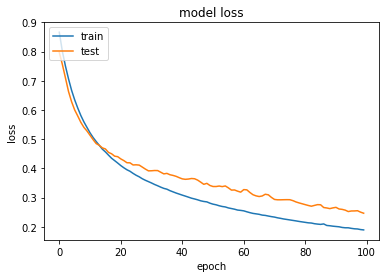

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()